<a href="https://colab.research.google.com/github/amsaghiri/Multi-armed-bandit/blob/main/MAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

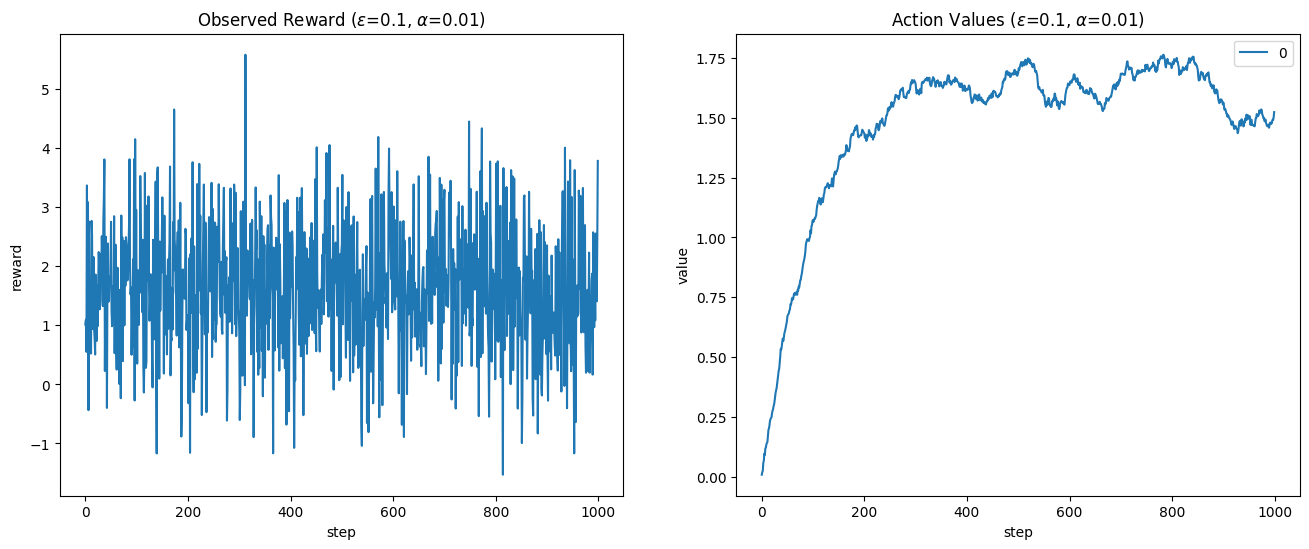

In [16]:
import numpy as np
import matplotlib.pyplot as plt


def epsilon_greedy(q, epsilon):
    if np.random.random() < epsilon:
        return np.random.randint(len(q))
    else:
        return np.argmax(q)


def update_action_value(q, action, reward, alpha):
    q[action] += alpha * (reward - q[action])
    return q[action]


def multi_armed_bandit(n_arms, epsilon, alpha, n_steps):
    # Gaussian bandit parameters
    mu = np.random.normal(size=n_arms)

    # Evaluation and reporting state
    q = np.zeros(n_arms)
    qs = np.zeros((n_steps, n_arms))
    rewards = np.zeros(n_steps)
    actions = np.zeros(n_steps)
    optimal = np.zeros(n_steps)

    # Run the bandit
    for t in range(n_steps):
        # Choose an action
        action = epsilon_greedy(q, epsilon)
        actions[t] = action

        # Compute rewards for all actions
        all_rewards = np.random.normal(mu)

        # Observe the reward for the chosen action
        reward = all_rewards[action]
        rewards[t] = reward

        # Was it the best possible choice?
        optimal_action = np.argmax(all_rewards)
        optimal[t] = action == optimal_action

        # Update the action value
        q[action] = update_action_value(q, action, reward, alpha)
        qs[t] = q

    results = {
        'qs': qs,
        'actions': actions,
        'rewards': rewards,
        'mu': mu,
        'optimal': optimal
    }

    return results


# @markdown Execute to see visualization

# set for reproducibility, comment out / change seed value for different results
np.random.seed(1)

n_arms = 1
epsilon = 0.1
alpha = 0.01
n_steps = 1000

results = multi_armed_bandit(n_arms, epsilon, alpha, n_steps)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 6))
ax1.plot(results['rewards'])
ax1.set(title=f'Observed Reward ($\epsilon$={epsilon}, $\\alpha$={alpha})',
        xlabel='step', ylabel='reward')
ax2.plot(results['qs'])
ax2.set(title=f'Action Values ($\epsilon$={epsilon}, $\\alpha$={alpha})',
        xlabel='step', ylabel='value')
ax2.legend(range(n_arms))
plt.show()


# New Section